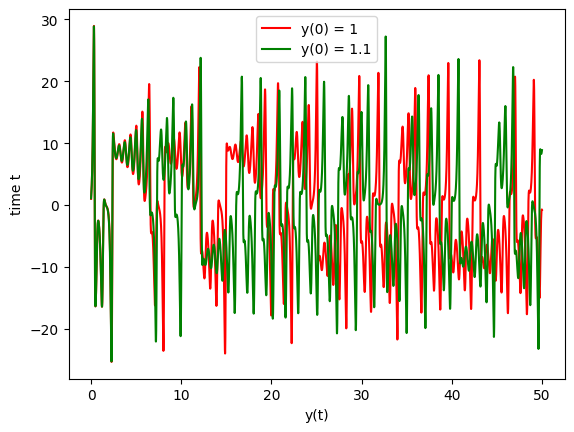

Text(0.5, 1.0, 'Phase Plot')

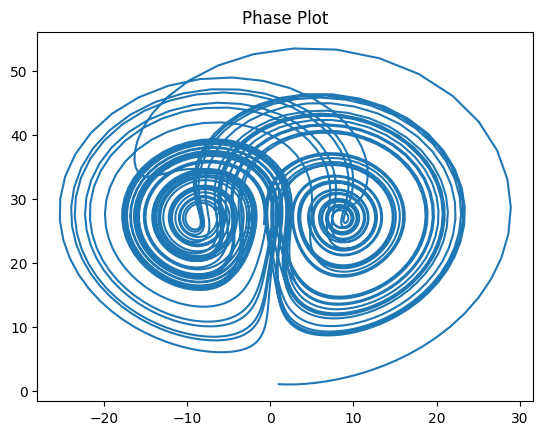

In [5]:
import matplotlib.pyplot as plt
from euler import euler
import numpy as np

sigma = 10
b = 8/3
r = 28

F = lambda t, x: np.array(
    [-sigma * x[0] + sigma * x[1],
     -x[0] * x[2] + r*x[0] - x[1],
     x[0]*x[1] - b*x[2]
     ]
)

x0 = [1, 1, 1]
x01 = [1, 1.1, 1]
t0 = 0
tmax = 50
dt = 0.01

t, x1 = euler(F, x0, t0, tmax, dt)
t, x2 = euler(F, x01, t0, tmax, dt)

plt.plot(
         t, x1[:, 1], "r",
         t, x2[:, 1], "g"
         )
plt.xlabel("y(t)")
plt.ylabel("time t")
plt.legend(["y(0) = 1", "y(0) = 1.1"])
plt.show()

plt.plot(x1[:, 1], x1[:, 2])
plt.title("Phase Plot")
